In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dmp_discrete

[[ 0.          0.          0.00154607  0.00463822  0.00927644  0.0170068
   0.02628324  0.03710575  0.04947434  0.06493506  0.08503401  0.1144094
   0.14223871  0.17779839  0.21490414  0.24891775  0.28293135  0.32003711
   0.34941249  0.37724181  0.40661719  0.43444651  0.45609153  0.4746444
   0.49319728  0.51020408  0.52411874  0.5318491   0.53339518  0.52721088
   0.51638837  0.49938157  0.47928262  0.4576376   0.43290043  0.40352505
   0.37260359  0.34013605  0.3030303   0.27056277  0.24427953  0.21645022
   0.1886209   0.16233766  0.14533086  0.12987013  0.11750155  0.10822511
   0.10049474  0.09431045  0.09121831  0.08812616  0.08658009  0.08503401
   0.08503401  0.08503401  0.08658009  0.09276438  0.10513296  0.12368584
   0.14687693  0.16852195  0.19016698  0.22263451  0.26437848  0.29839208
   0.35868893  0.40352505  0.46227582  0.50401979  0.55194805  0.59833024
   0.63234385  0.67717996  0.71273964  0.74520717  0.79004329  0.82560297
   0.83333333]
 [ 0.          0.0125523  

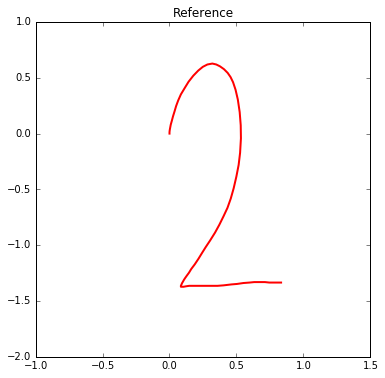

In [16]:
data = np.load('arr_0.npy').T
y_des = data - data[:, 0][:, None] # x,y coordinates info. to draw number 2
print(y_des)

plt.figure(1, figsize=(6, 6))
plt.plot(y_des[0, :], y_des[1, :], 'r', lw=2)
plt.title('Reference')
plt.xlim([-1, 1.5])
plt.ylim([-2, 1])
plt.show()

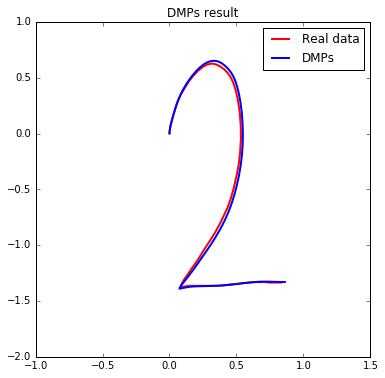

In [18]:
n_dmps = 2 # x,y -> 2 dimensions
n_bfs = 500
a_y = np.ones(n_dmps)*10.0
dt = 0.01
runTime = 1.0

dmp = dmp_discrete.DMP_discrete(n_dmps=n_dmps, n_bfs=n_bfs, dt=dt, runTime=runTime, a_y=a_y)
y_traj = np.zeros((dmp.n_step, dmp.n_dmps))
dy_traj = np.zeros((dmp.n_step, dmp.n_dmps))
ddy_traj = np.zeros((dmp.n_step, dmp.n_dmps))
dmp.imitate_path(y_des=y_des, plot=False)
for i in range(dmp.n_step):
    y_traj[i], dy_traj[i], ddy_traj[i] = dmp.step() 
    
plt.figure(1, figsize=(6, 6))
plt.plot(y_des[0, :], y_des[1, :], 'r', lw=2)
plt.plot(y_traj[:, 0], y_traj[:, 1], 'b', lw=2)
plt.title('DMPs result')
plt.xlim([-1, 1.5])
plt.ylim([-2, 1])
plt.legend(['Real data', 'DMPs'])
plt.show()
